In [2]:
import os
import random
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

# Sentiment analysis

## Data preparation

In [3]:
data = pd.read_csv(r'C:\Users\B.R\Documents\HvA\Master_DDB\MP\Scraper_eWOM\eWOM\spiders\metacritic.csv')
data.columns

Index(['Game', 'Metascore', 'UserScore', 'Publisher', 'ReleaseDate', 'Genre',
       'NumberOfOnlinePlayers', 'Cast', 'Credits', 'CriticsReviews',
       'UserReviews'],
      dtype='object')

In [4]:
#Drop NAN
data = data[data['CriticsReviews'].notna()]

In [5]:
#Check dataset
data['CriticsReviews']

0        [{'CriticName': None, 'CriticScore': '75', 'Cr...
1        [{'CriticName': None, 'CriticScore': '70', 'Cr...
2        [{'CriticName': 'Electronic Gaming Monthly', '...
3        [{'CriticName': None, 'CriticScore': '100', 'C...
4        [{'CriticName': None, 'CriticScore': '80', 'Cr...
                               ...                        
49825    [{'CriticName': None, 'CriticScore': '100', 'C...
49850    [{'CriticName': None, 'CriticScore': '70', 'Cr...
49860    [{'CriticName': None, 'CriticScore': '30', 'Cr...
49866    [{'CriticName': None, 'CriticScore': '85', 'Cr...
49874    [{'CriticName': None, 'CriticScore': '90', 'Cr...
Name: CriticsReviews, Length: 25529, dtype: object

In [6]:
#Lower case reviews
data['CriticsReviews'] = data['CriticsReviews'].str.lower()

In [7]:
#Remove stopwords
stop = stopwords.words('english')
data['CriticsReviews'] = data['CriticsReviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [8]:
#Create new dataset
sentiment_data = data[['Game', 'CriticsReviews']]
sentiment_data

,Game,CriticsReviews
0,Subnautica: Below Zero,"[{'criticname': none, 'criticscore': '75', 'cr..."
1,AntVentor,"[{'criticname': none, 'criticscore': '70', 'cr..."
2,Pilotwings 64,"[{'criticname': 'electronic gaming monthly', '..."
3,Wave Race 64,"[{'criticname': none, 'criticscore': '100', 'c..."
4,Madden NFL 08,"[{'criticname': none, 'criticscore': '80', 'cr..."
...,...,...
49825,GORN,"[{'criticname': none, 'criticscore': '100', 'c..."
49850,Citizens of Space,"[{'criticname': none, 'criticscore': '70', 'cr..."
49860,Bear With Me: The Lost Robots,"[{'criticname': none, 'criticscore': '30', 'cr..."
49866,Journey,"[{'criticname': none, 'criticscore': '85', 'cr..."


In [9]:
#Split reviews into rows
sentiment_data = sentiment_data.drop('CriticsReviews', axis=1).join(sentiment_data['CriticsReviews'].str.split(']', expand=True).stack().reset_index(level=1, drop=True).rename('CriticsReviews'))

In [10]:
#Drop columns with NaN
sentiment_data['CriticsReviews'] = sentiment_data['CriticsReviews'].dropna()

In [11]:
#Drop empty columns
sentiment_data = sentiment_data[sentiment_data.CriticsReviews != '']

In [12]:
#Check dataset
sentiment_data

,Game,CriticsReviews
0,Subnautica: Below Zero,"[{'criticname': none, 'criticscore': '75', 'cr..."
1,AntVentor,"[{'criticname': none, 'criticscore': '70', 'cr..."
2,Pilotwings 64,"[{'criticname': 'electronic gaming monthly', '..."
3,Wave Race 64,"[{'criticname': none, 'criticscore': '100', 'c..."
4,Madden NFL 08,"[{'criticname': none, 'criticscore': '80', 'cr..."
...,...,...
49825,GORN,"[{'criticname': none, 'criticscore': '100', 'c..."
49850,Citizens of Space,"[{'criticname': none, 'criticscore': '70', 'cr..."
49860,Bear With Me: The Lost Robots,"[{'criticname': none, 'criticscore': '30', 'cr..."
49866,Journey,"[{'criticname': none, 'criticscore': '85', 'cr..."


In [15]:
#DATASET IS CREATED ALREADY
#Create csv for sentiment analysis
#sentiment_data.to_excel(r'C:\Users\B.R\Documents\HvA\Master_DDB\MP\complete_model\sentiment_analysis\seperated_criticreviews.xlsx')

In [16]:
#Loading sentiment scores
sentimentscores = pd.read_csv(r'C:\Users\B.R\Documents\HvA\Master_DDB\MP\analysis\critic_model\sentiment_analysis\sentimentscores_criticreviews.csv')
sentimentscores.head()

,Game,StdDev_Sentiment,TotalNegative,TotalPositive,StdDev_ContainWord
0,"""Aha! I Found It!"" Hidden Object Game",0,10,11,0.200196
1,"""Aha! I Got It!"" Escape Game",3,2,4,0.090830
2,#Breakforcist Battle,3,6,10,0.164653
3,#DRIVE,-1,3,3,0.090837
4,#Funtime,-21,28,24,0.159769


# Innovativeness scores

In [17]:
import os
import random
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv(r'C:\Users\B.R\Documents\HvA\Master_DDB\MP\Scraper_eWOM\eWOM\spiders\metacritic.csv')
data.columns

Index(['Game', 'Metascore', 'UserScore', 'Publisher', 'ReleaseDate', 'Genre',
       'NumberOfOnlinePlayers', 'Cast', 'Credits', 'CriticsReviews',
       'UserReviews'],
      dtype='object')

In [19]:
#Loading innovativeness scores
innovativenesscores = pd.read_csv(r'C:\Users\B.R\Documents\HvA\Master_DDB\MP\analysis\critic_model\innovativeness_analysis\innovativeness_score_criticreviews.csv')
innovativenesscores.head()

,Game,Total_innovativeness,StdDev_innovativeness
0,"""Aha! I Found It!"" Hidden Object Game",0,0.0
1,"""Aha! I Got It!"" Escape Game",0,0.0
2,#Breakforcist Battle,0,0.0
3,#DRIVE,0,0.0
4,#Funtime,0,0.0


# LDA Topic analysis

In [67]:
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\B.R\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [68]:
data = pd.read_csv(r'C:\Users\B.R\Documents\HvA\Master_DDB\MP\Scraper_eWOM\eWOM\spiders\metacritic.csv')
data.reset_index(inplace=True)
data.columns

Index(['index', 'Game', 'Metascore', 'UserScore', 'Publisher', 'ReleaseDate',
       'Genre', 'NumberOfOnlinePlayers', 'Cast', 'Credits', 'CriticsReviews',
       'UserReviews'],
      dtype='object')

In [69]:
data.describe()

,index,Metascore,UserScore
count,49886.000000,17107.000000,9085.000000
mean,24942.500000,69.101654,6.479406
std,14400.992101,12.966122,0.682319
min,0.000000,11.000000,5.000000
25%,12471.250000,62.000000,6.000000
50%,24942.500000,71.000000,6.600000
75%,37413.750000,78.000000,7.100000
max,49885.000000,100.000000,7.400000


In [70]:
data.head()

,index,Game,Metascore,UserScore,Publisher,ReleaseDate,Genre,NumberOfOnlinePlayers,Cast,Credits,CriticsReviews,UserReviews
0,0,Subnautica: Below Zero,NaN,NaN,Bandai Namco Games,"May 14, 2021","ActionAdventure,Adventure,General,Sandbox",NaN,NaN,NaN,"[{'CriticName': None, 'CriticScore': '75', 'Cr...","[{'UserName': None, 'UserReviewScore': '75', '..."
1,1,AntVentor,NaN,NaN,LoopyMood,"Apr 23, 2021",NaN,NaN,NaN,NaN,"[{'CriticName': None, 'CriticScore': '70', 'Cr...","[{'UserName': None, 'UserReviewScore': '70', '..."
2,2,Pilotwings 64,80.0,NaN,Nintendo,"Sep 29, 1996","Simulation,General",1Player,"ShigeruMiyamoto , MakotoWada , YasuyukiOyagi","Designer , Director , CoDirector","[{'CriticName': 'Electronic Gaming Monthly', '...","[{'UserName': None, 'UserReviewScore': '80', '..."
3,3,Wave Race 64,92.0,NaN,Nintendo,"Nov 1, 1996","Driving,Racing,Snow/Water",1-2Players,"ShigeruMiyamoto , HiroshiYamauchi","Designer , Director","[{'CriticName': None, 'CriticScore': '100', 'C...","[{'UserName': None, 'UserReviewScore': '60', '..."
4,4,Madden NFL 08,75.0,NaN,EA Sports,"Aug 14, 2007",EATiburon,"Sports,Traditional,Football,Sim",Himself,VoiceActor:JohnMadden,"[{'CriticName': None, 'CriticScore': '80', 'Cr...","[{'UserName': None, 'UserReviewScore': '70', '..."


In [71]:
data['CriticsReviews'].describe()

count                                                 25529
unique                                                25319
top       [{'CriticName': 'Play Magazine', 'CriticScore'...
freq                                                      4
Name: CriticsReviews, dtype: object

In [72]:
# let's see how many na values we have
print(data['CriticsReviews'].isnull().sum())
print(data['CriticsReviews'].isna().sum())
# we drop the rows that we don't need
data = data[data['CriticsReviews'].notna()]

24357
24357


In [73]:
# make sure all data is clean and ready to work on
print(data['CriticsReviews'].isnull().sum())
print(data['CriticsReviews'].isna().sum())

0
0


In [74]:
import json
reviews = pd.DataFrame()
for index, row in data.iterrows():
    critic = row['CriticsReviews']
    critic = critic.replace("\'", "\"")
    critic = critic.replace("None", "\"\"")
    try:
      j = json.loads(critic)
    except:
      reviews = reviews.append({'index': row['index']}, ignore_index=True)
      continue
    j[0]['index'] = row['index']
    # Convert to pandas dataframe:
    dataframe = pd.DataFrame.from_dict(j, orient="columns")
    reviews = reviews.append(dataframe, ignore_index=False)

In [75]:
# reviews.reset_index(inplace=True)
reviews.head()

,CriticName,CriticScore,CriticReviewDate,CriticReviewText,index
0,,75,"May 17, 2021",Subnautica Below Zero is the perfect reincarna...,0.0
1,,70,"Apr 22, 2021",Given that AntVentor is merely the first act o...,1.0
2,NaN,NaN,NaN,NaN,2.0
3,NaN,NaN,NaN,NaN,3.0
4,NaN,NaN,NaN,NaN,4.0


In [76]:
df = pd.merge(reviews, data, on='index', how='outer')
df.head()

,CriticName,CriticScore,CriticReviewDate,CriticReviewText,index,Game,Metascore,UserScore,Publisher,ReleaseDate,Genre,NumberOfOnlinePlayers,Cast,Credits,CriticsReviews,UserReviews
0,,75,"May 17, 2021",Subnautica Below Zero is the perfect reincarna...,0.0,Subnautica: Below Zero,NaN,NaN,Bandai Namco Games,"May 14, 2021","ActionAdventure,Adventure,General,Sandbox",NaN,NaN,NaN,"[{'CriticName': None, 'CriticScore': '75', 'Cr...","[{'UserName': None, 'UserReviewScore': '75', '..."
1,,70,"Apr 22, 2021",Given that AntVentor is merely the first act o...,1.0,AntVentor,NaN,NaN,LoopyMood,"Apr 23, 2021",NaN,NaN,NaN,NaN,"[{'CriticName': None, 'CriticScore': '70', 'Cr...","[{'UserName': None, 'UserReviewScore': '70', '..."
2,NaN,NaN,NaN,NaN,2.0,Pilotwings 64,80.0,NaN,Nintendo,"Sep 29, 1996","Simulation,General",1Player,"ShigeruMiyamoto , MakotoWada , YasuyukiOyagi","Designer , Director , CoDirector","[{'CriticName': 'Electronic Gaming Monthly', '...","[{'UserName': None, 'UserReviewScore': '80', '..."
3,NaN,NaN,NaN,NaN,3.0,Wave Race 64,92.0,NaN,Nintendo,"Nov 1, 1996","Driving,Racing,Snow/Water",1-2Players,"ShigeruMiyamoto , HiroshiYamauchi","Designer , Director","[{'CriticName': None, 'CriticScore': '100', 'C...","[{'UserName': None, 'UserReviewScore': '60', '..."
4,NaN,NaN,NaN,NaN,4.0,Madden NFL 08,75.0,NaN,EA Sports,"Aug 14, 2007",EATiburon,"Sports,Traditional,Football,Sim",Himself,VoiceActor:JohnMadden,"[{'CriticName': None, 'CriticScore': '80', 'Cr...","[{'UserName': None, 'UserReviewScore': '70', '..."


In [77]:
df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            26279, 26280, 26281, 26282, 26283, 26284, 26285, 26286, 26287,
            26288],
           dtype='int64', length=26289)

In [78]:
data = df
data_text = data[['Game', 'CriticReviewText', 'UserScore']]
data_text['index'] = data_text.index
documents = data_text

<ipython-input-78-ab7cee0032c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text['index'] = data_text.index


In [79]:
len(documents)

26289

In [80]:
documents[:5]

,Game,CriticReviewText,UserScore,index
0,Subnautica: Below Zero,Subnautica Below Zero is the perfect reincarna...,NaN,0
1,AntVentor,Given that AntVentor is merely the first act o...,NaN,1
2,Pilotwings 64,NaN,NaN,2
3,Wave Race 64,NaN,NaN,3
4,Madden NFL 08,NaN,NaN,4


## Data Preprocessing

## Lemmatize example

In [81]:
print(WordNetLemmatizer().lemmatize('went', pos='v'))

go


## Stemmer Example

In [82]:
stemmer = SnowballStemmer('english')
original_words = ['caresses', 'flies', 'dies', 'mules', 'denied','died', 'agreed', 'owned', 
           'humbled', 'sized','meeting', 'stating', 'siezing', 'itemization','sensational', 
           'traditional', 'reference', 'colonizer','plotted']
singles = [stemmer.stem(plural) for plural in original_words]
pd.DataFrame(data = {'original word': original_words, 'stemmed': singles})

,original word,stemmed
0,caresses,caress
1,flies,fli
2,dies,die
3,mules,mule
4,denied,deni
5,died,die
6,agreed,agre
7,owned,own
8,humbled,humbl
9,sized,size


In [83]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [84]:
doc_sample = documents[documents['index'] == 4310].values[0][0]

print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
["Flip's", 'Twisted', 'World']


 tokenized and lemmatized document: 
['flip', 'twist', 'world']


In [85]:
#delete empty rows
documents = documents[documents.CriticReviewText != '']

In [86]:
processed_docs = documents['CriticReviewText'].astype(str).map(preprocess)

In [87]:
processed_docs[:10]

0    [subnautica, zero, perfect, reincarn, titl, of...
1    [give, antventor, mere, anttrilog, decent, set...
2                                                   []
3                                                   []
4                                                   []
5    [occasion, hiccup, have, open, world, freedom,...
6                                                   []
7                                                   []
8                                                   []
9                                                   []
Name: CriticReviewText, dtype: object

In [88]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [89]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 complet
1 deliv
2 experi
3 game
4 great
5 instal
6 offer
7 perfect
8 player
9 present
10 promis


In [90]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [91]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

[(2, 1),
 (3, 1),
 (4, 1),
 (37, 1),
 (96, 1),
 (150, 1),
 (182, 1),
 (246, 1),
 (333, 1),
 (411, 1),
 (455, 1),
 (612, 1),
 (689, 1),
 (895, 1),
 (1327, 1),
 (1366, 1),
 (1370, 1),
 (1484, 1),
 (1505, 1),
 (1653, 1),
 (1881, 1),
 (1931, 1)]

In [92]:
bow_doc_4310 = bow_corpus[4310]

for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                                     dictionary[bow_doc_4310[i][0]], 
                                                     bow_doc_4310[i][1]))

Word 2 ("experi") appears 1 time.
Word 3 ("game") appears 1 time.
Word 4 ("great") appears 1 time.
Word 37 ("look") appears 1 time.
Word 96 ("packag") appears 1 time.
Word 150 ("style") appears 1 time.
Word 182 ("level") appears 1 time.
Word 246 ("access") appears 1 time.
Word 333 ("combin") appears 1 time.
Word 411 ("entertain") appears 1 time.
Word 455 ("skill") appears 1 time.
Word 612 ("free") appears 1 time.
Word 689 ("eas") appears 1 time.
Word 895 ("neat") appears 1 time.
Word 1327 ("framework") appears 1 time.
Word 1366 ("involv") appears 1 time.
Word 1370 ("bunch") appears 1 time.
Word 1484 ("ensur") appears 1 time.
Word 1505 ("board") appears 1 time.
Word 1653 ("refin") appears 1 time.
Word 1881 ("stress") appears 1 time.
Word 1931 ("colour") appears 1 time.


## TF-IDF

In [93]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)

In [94]:
corpus_tfidf = tfidf[bow_corpus]

In [95]:
from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.2023414783900146),
 (1, 0.21439155729417805),
 (2, 0.1326188484196812),
 (3, 0.05529093151973001),
 (4, 0.13622652747819816),
 (5, 0.3043636477003112),
 (6, 0.3282166243921848),
 (7, 0.18616594533413106),
 (8, 0.1552071463580096),
 (9, 0.2046760017824573),
 (10, 0.2921461658130136),
 (11, 0.39643367972796245),
 (12, 0.15532003935848196),
 (13, 0.46218872593754784),
 (14, 0.3043636477003112)]


## Running LDA using TF-IDF

In [96]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [97]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.041*"game" + 0.013*"play" + 0.011*"stori" + 0.010*"experi" + 0.010*"like" + 0.010*"time" + 0.008*"want" + 0.007*"world" + 0.007*"look" + 0.007*"gameplay"
Topic: 1 
Words: 0.032*"game" + 0.019*"stori" + 0.012*"good" + 0.012*"player" + 0.011*"look" + 0.011*"adventur" + 0.010*"experi" + 0.010*"great" + 0.010*"genr" + 0.009*"charact"
Topic: 2 
Words: 0.073*"game" + 0.016*"like" + 0.016*"play" + 0.013*"enjoy" + 0.012*"experi" + 0.011*"time" + 0.010*"feel" + 0.009*"good" + 0.008*"gameplay" + 0.007*"puzzl"
Topic: 3 
Words: 0.031*"game" + 0.015*"gameplay" + 0.012*"like" + 0.011*"titl" + 0.010*"worth" + 0.010*"experi" + 0.009*"charact" + 0.009*"play" + 0.009*"fan" + 0.008*"great"
Topic: 4 
Words: 0.042*"game" + 0.023*"play" + 0.023*"time" + 0.013*"like" + 0.010*"love" + 0.010*"want" + 0.009*"enjoy" + 0.008*"hour" + 0.008*"look" + 0.007*"feel"
Topic: 5 
Words: 0.044*"game" + 0.013*"good" + 0.012*"best" + 0.011*"content" + 0.011*"issu" + 0.010*"seri" + 0.009*"version" + 0.008*"

## Performance evaluation by classifying sample document using LDA Bag of Words model

In [98]:
processed_docs[4310]

['overal', 'lack', 'polish', 'poor', 'enemi', 'design']

In [99]:
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.37017956376075745	 
Topic: 0.039*"game" + 0.014*"littl" + 0.011*"like" + 0.011*"genr" + 0.009*"puzzl" + 0.009*"good" + 0.008*"time" + 0.008*"offer" + 0.008*"great" + 0.008*"titl"

Score: 0.23778438568115234	 
Topic: 0.040*"game" + 0.021*"level" + 0.018*"challeng" + 0.015*"play" + 0.015*"great" + 0.010*"simpl" + 0.010*"like" + 0.010*"puzzl" + 0.010*"design" + 0.008*"control"

Score: 0.20349819958209991	 
Topic: 0.055*"game" + 0.017*"play" + 0.012*"experi" + 0.011*"player" + 0.008*"gameplay" + 0.007*"enjoy" + 0.007*"high" + 0.007*"like" + 0.007*"time" + 0.006*"visual"

Score: 0.1624370515346527	 
Topic: 0.032*"game" + 0.019*"stori" + 0.012*"good" + 0.012*"player" + 0.011*"look" + 0.011*"adventur" + 0.010*"experi" + 0.010*"great" + 0.010*"genr" + 0.009*"charact"


## Testing model on unseen document

In [100]:
unseen_document = 'How a Pentagon deal became an identity crisis for Google'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.699918806552887	 Topic: 0.032*"game" + 0.019*"stori" + 0.012*"good" + 0.012*"player" + 0.011*"look"
Score: 0.033346980810165405	 Topic: 0.041*"game" + 0.013*"play" + 0.011*"stori" + 0.010*"experi" + 0.010*"like"
Score: 0.033346474170684814	 Topic: 0.039*"game" + 0.014*"littl" + 0.011*"like" + 0.011*"genr" + 0.009*"puzzl"
Score: 0.03334344923496246	 Topic: 0.073*"game" + 0.016*"like" + 0.016*"play" + 0.013*"enjoy" + 0.012*"experi"
Score: 0.03334137052297592	 Topic: 0.055*"game" + 0.017*"play" + 0.012*"experi" + 0.011*"player" + 0.008*"gameplay"
Score: 0.03334108740091324	 Topic: 0.040*"game" + 0.021*"level" + 0.018*"challeng" + 0.015*"play" + 0.015*"great"
Score: 0.033340904861688614	 Topic: 0.042*"game" + 0.023*"play" + 0.023*"time" + 0.013*"like" + 0.010*"love"
Score: 0.03334074094891548	 Topic: 0.031*"game" + 0.015*"gameplay" + 0.012*"like" + 0.011*"titl" + 0.010*"worth"
Score: 0.03334067016839981	 Topic: 0.044*"game" + 0.013*"good" + 0.012*"best" + 0.011*"content" + 0.011*"

## Identifying the most dominant topic within reviews

In [101]:
def format_topics_sentences(ldamodel=None, corpus=bow_corpus, texts=documents['CriticReviewText']):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [102]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=bow_corpus, texts=documents['CriticReviewText'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,8.0,0.7914,"game, play, race, best, mode, offer, multiplay...",Subnautica Below Zero is the perfect reincarna...
1,1,5.0,0.9100,"game, good, best, content, issu, seri, version...",Given that AntVentor is merely the first act o...
2,2,0.0,0.1000,"game, play, stori, experi, like, time, want, w...",NaN
3,3,0.0,0.1000,"game, play, stori, experi, like, time, want, w...",NaN
4,4,0.0,0.1000,"game, play, stori, experi, like, time, want, w...",NaN
5,5,3.0,0.7653,"game, gameplay, like, titl, worth, experi, cha...","Occasional hiccups or no, having this much ope..."
6,6,0.0,0.1000,"game, play, stori, experi, like, time, want, w...",NaN
7,7,0.0,0.1000,"game, play, stori, experi, like, time, want, w...",NaN
8,8,0.0,0.1000,"game, play, stori, experi, like, time, want, w...",NaN
9,9,0.0,0.1000,"game, play, stori, experi, like, time, want, w...",NaN


# Merging data analysis outcome

In [103]:
sales_data = pd.read_csv(r'C:\Users\B.R\Documents\HvA\Master_DDB\MP\Scraper_eWOM\eWOM\spiders\vgchartz.csv')
sales_data.head()

,Game,Platform,Publisher,VGChartzScore,CriticScore,TotalSales,ReleaseDate,LastUpdate
0,Grand Theft Auto: Liberty City Stories,PSP,Rockstar Games,N/A,8.8,7.72m,25th Oct 05,NaN
1,Grand Theft Auto: Vice City Stories,PSP,Rockstar Games,N/A,8.4,5.08m,31st Oct 06,NaN
2,Monster Hunter Freedom 3,PSP,Capcom,N/A,N/A,4.87m,01st Dec 10,08th Jan 19
3,Gran Turismo,PSP,Sony Computer Entertainment,7.5,7.7,2.93m,01st Oct 09,NaN
4,Monster Hunter Freedom Unite,PSP,Capcom,N/A,7.7,5.50m,23rd Jun 09,NaN


In [104]:
#merging sales data with metacritic reviews
merge_sales = pd.merge(documents, sales_data, on='Game', how='left')

In [105]:
#merging topic dominance scores
topicsales = merge_sales.merge(df_dominant_topic, left_index=True, right_index=True)

In [106]:
#merging sentimentscores
sentisales = pd.merge(topicsales, sentimentscores, on='Game', how='left')

In [107]:
#merging innovativeness scores
finaldata = pd.merge(innovativenesscores, sentisales, on='Game', how='left')

In [108]:
#Drop NaNs for the regression
finaldata.dropna(subset = ['StdDev_ContainWord', 'Total_innovativeness', 'Topic_Perc_Contrib', 'UserScore', 'TotalSales'], inplace=True)

In [109]:
finaldata['TotalSales'] = finaldata['TotalSales'].map(lambda x: x.rstrip('m'))

In [110]:
#validation on null data and NaNs in dataset
print(finaldata[['StdDev_ContainWord', 'Total_innovativeness', 'Topic_Perc_Contrib', 'UserScore', 'TotalSales']].isnull().sum())
print(finaldata[['StdDev_ContainWord', 'Total_innovativeness', 'Topic_Perc_Contrib', 'UserScore', 'TotalSales']].isna().sum())

StdDev_ContainWord      0
Total_innovativeness    0
Topic_Perc_Contrib      0
UserScore               0
TotalSales              0
dtype: int64
StdDev_ContainWord      0
Total_innovativeness    0
Topic_Perc_Contrib      0
UserScore               0
TotalSales              0
dtype: int64


In [111]:
finaldata.head()

,Game,Total_innovativeness,StdDev_innovativeness,CriticReviewText,UserScore,index,Platform,Publisher,VGChartzScore,CriticScore,...,LastUpdate,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,StdDev_Sentiment,TotalNegative,TotalPositive,StdDev_ContainWord
28,007 Legends,6,0.286033,NaN,5.0,2593.0,WiiU,Activision,N/A,4.2,...,16th Mar 18,2623.0,1.0,0.4203,"game, stori, good, player, look, adventur, exp...",Basically Dance Dance Revolution for your thum...,-2.0,17.0,17.0,0.121101
32,007: Quantum of Solace,9,0.349509,The cover-feature provides a tactical touch to...,7.3,3070.0,PS3,Activision,N/A,6.6,...,NaN,3148.0,6.0,0.4945,"game, littl, like, genr, puzzl, good, time, of...",Bplus has succeeded in creating a very fun lit...,0.0,14.0,14.0,0.123245
33,007: Quantum of Solace,9,0.349509,NaN,7.0,13471.0,PS3,Activision,N/A,6.6,...,NaN,14205.0,0.0,0.1000,"game, play, stori, experi, like, time, want, w...",NaN,0.0,14.0,14.0,0.123245
34,007: Quantum of Solace,9,0.349509,NaN,6.6,19219.0,PS3,Activision,N/A,6.6,...,NaN,20401.0,8.0,0.8153,"game, play, race, best, mode, offer, multiplay...",NaN,0.0,14.0,14.0,0.123245
94,2010 FIFA World Cup South Africa,0,0.000000,This is a fantastic title that not only all Wi...,6.7,3707.0,PSP,EA Sports,N/A,6.8,...,NaN,3827.0,2.0,0.4776,"game, like, play, enjoy, experi, time, feel, g...","As always with the McRae series, the sublime h...",26.0,16.0,31.0,0.154138


# Multivariate regression


In [127]:
#define X and Y dependent and independent variables
X = finaldata[['StdDev_ContainWord', 'StdDev_innovativeness', 'Topic_Perc_Contrib', 'UserScore']].astype(float)
y = finaldata['TotalSales'].astype(float)

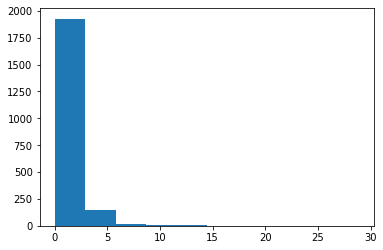

In [128]:
#check distribution of data again
plt.hist(y, bins=10)
plt.show()

In [129]:
#apply data tranformation with log transformation
y = np.log(y+1)

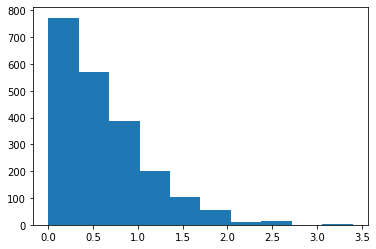

In [130]:
#check distribution of the data
plt.hist(y, bins=10)
plt.show()

In [132]:
#adding a constant (Y-intercept)
X = sm.add_constant(X)

In [135]:
#Checking multicolinearity variance inflation factor (VIF >5.0)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                 feature         VIF
0                  const  125.345435
1     StdDev_ContainWord    1.027202
2  StdDev_innovativeness    1.031184
3     Topic_Perc_Contrib    1.004705
4              UserScore    1.008047


In [133]:
#define model
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

In [134]:
#print regression results
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             TotalSales   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     17.82
Date:                Thu, 17 Jun 2021   Prob (F-statistic):           2.12e-14
Time:                        14:55:43   Log-Likelihood:                -1525.9
No. Observations:                2110   AIC:                             3062.
Df Residuals:                    2105   BIC:                             3090.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.12